In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
anime_data = pd.read_csv("./new_anime_data.csv")

In [19]:
anime_data.drop(columns=["Unnamed: 0"], inplace=True)

In [20]:
#ジャンルでone-hot-encodingを作成
one_hot_encoding_j = anime_data["genre"].str.get_dummies(sep=", ")

In [21]:
one_hot_encoding_t = pd.get_dummies(anime_data, columns=["type"])
one_hot_encoding_t.drop(columns=["anime_id", "name", "genre", "rating", "episodes", "members"], inplace=True)
one_hot_encoding_t

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
3906,0,0,0,0,1,0
3907,0,0,0,1,0,0
3908,0,0,0,1,0,0
3909,0,0,0,1,0,0


In [22]:
#new_anime_dataとone_hot_encodingを結合
clustering_data = pd.concat([anime_data, one_hot_encoding_j, one_hot_encoding_t], axis=1)
clustering_data

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Thriller,Vampire,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,31283,Bikini Warriors Special,"Comedy, Ecchi, Fantasy, Parody, Yuri",Special,1,5.50,5191,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3907,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3908,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3909,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [23]:
#episodesをobjectからfloat型に変換
clustering_data["episodes"] = pd.to_numeric(clustering_data["episodes"], errors="coerce")

In [24]:
#episodesの統計量を確認
clustering_data["episodes"].describe()

count    3911.000000
mean       13.926106
std        36.535838
min         0.000000
25%         1.000000
50%        11.000000
75%        13.000000
max      1787.000000
Name: episodes, dtype: float64

In [25]:
#episodesを範囲に分けてダミー変数にする
clustering_data["episode_under_less1"] = clustering_data["episodes"].apply(lambda x: 1 if x <= 1 else 0)
clustering_data["episode_under_less5"] = clustering_data["episodes"].apply(lambda x: 1 if 1 < x <= 5 else 0)
clustering_data["episode_under_less12"] = clustering_data["episodes"].apply(lambda x: 1 if 5 < x <= 12 else 0)
clustering_data["episode_under_less36"] = clustering_data["episodes"].apply(lambda x: 1 if 12 < x <= 36 else 0)
clustering_data["episode_under_over"] = clustering_data["episodes"].apply(lambda x: 1 if x > 36 else 0)
clustering_data

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,type_Music,type_ONA,type_OVA,type_Special,type_TV,episode_under_less1,episode_under_less5,episode_under_less12,episode_under_less36,episode_under_over
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,31283,Bikini Warriors Special,"Comedy, Ecchi, Fantasy, Parody, Yuri",Special,1,5.50,5191,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3907,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3908,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3909,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [26]:
#必要のないカラムを削除
new_clustering_data = clustering_data.drop(columns=["anime_id", "name", "genre", "type", "episodes", "rating", "members"])
new_clustering_data

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,type_Music,type_ONA,type_OVA,type_Special,type_TV,episode_under_less1,episode_under_less5,episode_under_less12,episode_under_less36,episode_under_over
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
3907,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3908,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3909,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [27]:
print(new_clustering_data.isnull().sum())

Action                  0
Adventure               0
Cars                    0
Comedy                  0
Dementia                0
Demons                  0
Drama                   0
Ecchi                   0
Fantasy                 0
Game                    0
Harem                   0
Hentai                  0
Historical              0
Horror                  0
Josei                   0
Kids                    0
Magic                   0
Martial Arts            0
Mecha                   0
Military                0
Music                   0
Mystery                 0
Parody                  0
Police                  0
Psychological           0
Romance                 0
Samurai                 0
School                  0
Sci-Fi                  0
Seinen                  0
Shoujo                  0
Shoujo Ai               0
Shounen                 0
Shounen Ai              0
Slice of Life           0
Space                   0
Sports                  0
Super Power             0
Supernatural

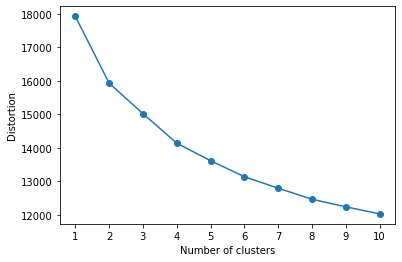

In [28]:
#エルボー法
distortions = []
for i in range(1, 11):              
    km = KMeans(n_clusters=i,
                init="k-means++",     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                )
    km.fit(new_clustering_data) 
    distortions.append(km.inertia_)
    
# グラフのプロット
plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [29]:
#K-Means
n_clusters = 8
km = KMeans(n_clusters=n_clusters)
km.fit_predict(new_clustering_data)
cluster_labels = km.predict(new_clustering_data)

In [30]:
anime_data["cluster"] = cluster_labels
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members,cluster
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,3
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,4
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,4
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,4


In [42]:
anime_data[anime_data["cluster"] == 0].sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members,cluster
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,0
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,0
223,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690,0
281,18679,Kill la Kill,"Action, Comedy, School, Super Power",TV,24,8.23,508118,0
160,5081,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire",TV,15,8.39,482268,0
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,0
463,849,Suzumiya Haruhi no Yuuutsu,"Comedy, Mystery, Parody, School, Sci-Fi, Slice...",TV,14,8.06,428569,0
164,853,Ouran Koukou Host Club,"Comedy, Harem, Romance, School, Shoujo",TV,26,8.39,422271,0
16,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,0
488,15809,Hataraku Maou-sama!,"Comedy, Demons, Fantasy, Romance, Shounen",TV,13,8.03,409037,0


In [43]:
anime_data[anime_data["cluster"] == 1].sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members,cluster
370,4059,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen","Drama, Romance, School, Slice of Life",Special,1,8.14,160423,1
126,10863,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller",Special,1,8.46,159548,1
837,9062,Angel Beats! Specials,"Action, Comedy, School, Supernatural",Special,2,7.79,139013,1
501,6351,"Clannad: After Story - Mou Hitotsu no Sekai, K...","Drama, Romance, School",Special,1,8.02,138364,1
419,7338,Darker than Black: Kuro no Keiyakusha Gaiden,"Action, Mystery, Sci-Fi, Super Power",Special,4,8.09,136135,1
1138,10067,Angel Beats!: Another Epilogue,"Drama, School, Supernatural",Special,1,7.63,134180,1
2621,20021,Sword Art Online: Extra Edition,"Action, Adventure, Fantasy, Game, Romance",Special,1,7.00,121722,1
1868,376,Elfen Lied Special,"Drama, Ecchi, Horror, Psychological, Supernatural",Special,1,7.34,116129,1
320,16001,Kokoro Connect: Michi Random,"Comedy, Drama, Romance, School, Slice of Life,...",Special,4,8.19,106989,1
207,27821,Fate/stay night: Unlimited Blade Works - Prologue,"Action, Fantasy, Magic, Shounen, Supernatural",Special,1,8.32,106382,1


In [44]:
anime_data[anime_data["cluster"] == 2].sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members,cluster
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,2
786,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,2
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,2
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,2
443,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,2
744,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511,2
637,9919,Ao no Exorcist,"Action, Demons, Fantasy, Shounen, Supernatural",TV,25,7.92,583823,2
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,2
29,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,8.78,562962,2
166,6746,Durarara!!,"Action, Mystery, Supernatural",TV,24,8.38,556431,2


In [45]:
anime_data[anime_data["cluster"] == 3].sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members,cluster
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,3
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556,3
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186,3
410,1689,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",Movie,3,8.10,324035,3
132,2236,Toki wo Kakeru Shoujo,"Adventure, Drama, Romance, Sci-Fi",Movie,1,8.44,289206,3
115,523,Tonari no Totoro,"Adventure, Comedy, Supernatural",Movie,1,8.48,271484,3
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297,3
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193,3
225,5681,Summer Wars,"Comedy, Sci-Fi",Movie,1,8.30,223359,3
191,43,Ghost in the Shell,"Action, Mecha, Police, Psychological, Sci-Fi, ...",Movie,1,8.34,223036,3


In [46]:
anime_data[anime_data["cluster"] == 4].sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members,cluster
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,4
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,4
820,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,4
577,269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055,4
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384,4
288,6702,Fairy Tail,"Action, Adventure, Comedy, Fantasy, Magic, Sho...",TV,175,8.22,584590,4
438,3588,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,8.08,580184,4
610,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,0,7.94,533578,4
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,0,8.58,504862,4
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,4


In [47]:
anime_data[anime_data["cluster"] == 5].sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members,cluster
446,22319,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,...",TV,12,8.07,618056,5
23,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458,5
1541,8074,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892,5
690,11111,Another,"Horror, Mystery, School, Supernatural, Thriller",TV,12,7.88,534657,5
339,20507,Noragami,"Action, Adventure, Shounen, Supernatural",TV,12,8.17,515378,5
57,9989,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11,8.62,463835,5
96,9756,Mahou Shoujo Madoka★Magica,"Drama, Magic, Psychological, Thriller",TV,12,8.51,462974,5
1474,6880,Deadman Wonderland,"Action, Horror, Sci-Fi",TV,12,7.48,453454,5
1401,27899,Tokyo Ghoul √A,"Action, Drama, Horror, Mystery, Psychological,...",TV,12,7.52,408357,5
49,31043,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural",TV,12,8.65,402381,5


In [48]:
anime_data[anime_data["cluster"] == 6].sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members,cluster
118,19815,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,8.47,602291,6
1010,11617,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School",TV,12,7.70,398660,6
578,14741,Chuunibyou demo Koi ga Shitai!,"Comedy, Drama, Romance, School, Slice of Life",TV,12,7.95,394399,6
1258,10719,Boku wa Tomodachi ga Sukunai,"Comedy, Ecchi, Harem, Romance, School, Seinen,...",TV,12,7.57,325664,6
1460,8769,Ore no Imouto ga Konnani Kawaii Wake ga Nai,"Comedy, Seinen, Slice of Life",TV,12,7.49,321477,6
1337,15583,Date A Live,"Comedy, Harem, Mecha, Romance, School, Sci-Fi",TV,12,7.54,301358,6
262,23289,Gekkan Shoujo Nozaki-kun,"Comedy, Romance, School",TV,12,8.24,292622,6
586,8525,Kami nomi zo Shiru Sekai,"Comedy, Harem, Romance, Shounen, Supernatural",TV,12,7.95,284846,6
3585,2476,School Days,"Drama, Harem, Romance, School",TV,12,6.17,279183,6
711,15451,High School DxD New,"Action, Comedy, Demons, Ecchi, Harem, Romance,...",TV,12,7.87,266657,6


In [49]:
anime_data[anime_data["cluster"] == 7].sort_values("members", ascending=False)[:20]

,anime_id,name,genre,type,episodes,rating,members,cluster
453,227,FLCL,"Action, Comedy, Dementia, Mecha, Parody, Sci-Fi",OVA,6,8.06,305165,7
3009,9515,Highschool of the Dead: Drifters of the Dead,"Comedy, Ecchi, Supernatural",OVA,1,6.77,140501,7
993,16762,Mirai Nikki Redial,"Action, Psychological, Shounen, Supernatural",OVA,1,7.71,135604,7
2115,7059,Black★Rock Shooter (OVA),"Action, Drama, School, Slice of Life",OVA,1,7.24,130665,7
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307,7
2378,15037,Corpse Party: Tortured Souls - Bougyakusareta ...,"Horror, Mystery",OVA,4,7.12,126699,7
705,18397,Shingeki no Kyojin OVA,"Action, Drama, Fantasy, Shounen, Super Power",OVA,3,7.88,121063,7
2871,357,Bokusatsu Tenshi Dokuro-chan,"Comedy, Ecchi, Magic",OVA,4,6.85,117080,7
1414,8460,Mirai Nikki,"Action, Shounen, Supernatural",OVA,1,7.51,114217,7
465,268,Golden Boy,"Adventure, Comedy, Ecchi",OVA,6,8.05,113040,7
